<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Sesión Sincrónica Semana 3


En la tercer semana nos enfocaremos en el análisis de clusters, haciendo hicapié en K-medias y K-meoides.


**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.



# Introducción al análisis de clusters

Tanto Clustering como PCA y SVD buscan simplificar los datos de forma no supervizada, pero sus mecanismos son diferentes:

- PCA y SVD buscan encontrar una representación de baja dimensión de las observaciones que explique una buena fracción de la varianza;

- Clustering busca encontrar subgrupos homogéneos entre las observaciones.


## ¿Qué es el análisis de clusters? 

El análisis de clusters es una de las principales aplicaciones de los algoritmos de aprendizaje no supervisado. Este tipo de análisis se utiliza para juntar observaciones similares en grupos.

El gráfico siguiente ilustra el resultado de un análisis de clusters basado en dos variables:


<div style="max-width:500px">
<img src = "figs/plot_clustering_notebook.png" />
</div>

Se puede apreciar que las observaciones se pueden separar claramente en 3 grupos o clusters, donde las observaciones son lo mas similares dentro de los clusters y  disimilares entre ellos.




## Clustering para "Marketing Data Science"

Para que un negocio prospere, es fundamental atraer nuevos clientes, al mismo tiempo que reteniendo efectivamente los actuales. 

El análisis de clusters facilita identificar grupos homogéneos permitiendo realizar estrategias que permiten captar oportunidades que los análisis tradicionales a menudo no son capaces.

En esta tarea es importante que los segmentos identificados mediante el análisis de clusters deben ser tanto reconocibles como accesibles. Esto permite a los gerentes de marketing personalizar productos y mensajes de manera eficaz, optimizando las campañas de marketing para alcanzar de manera efectiva a cada grupo.

Para ello es crucial elegir variables que no solo segmenten efectivamente el mercado, sino que también sean fáciles de medir y estén ampliamente disponibles. 



### Caso 1:

<div >
<img src = "figs/RethinkSegmentation.png" />
</div>

### Caso 2:

<div >
<img src = "figs/Harrans.png" />
</div>

<div >
    <img src = "figs/WallStreet.png" />

</div>

### Caso 3:


<div >
    <img src = "figs/Metlife.png" />

</div>


<div >
    <img src = "figs/Metlife2.png" />

</div>


Las etapas del análisis de clusters podemos resumirlas de la siguiente forma:

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk} 
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering. Existen varios tipos, en esta semana nos centramos en aquellos  **Algoritmos basados en centroides**: cada cluster está representado por un centroide. Los clusters se construyen en función de la distancia al centroide del grupo.






## Clustering

### K-medias

- El algorito de K-medias, forma parte de los algoritmos de clustering basados en centroides y es uno de los más intutivos y utilizados. 
   
- El algoritmo  agrupa las observaciones en un número predefinido de K clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible.
   
- En otra palabras, busca que las observaciones dentro del cluster sean los más similares entre si, y fuera de los clusters lo más disimilares entre ellas.


### K-Medoides  

-  K-medoides es un método de clustering muy similar a K-medias puesto que ambos agrupan las observaciones en K clusters. 

-  Sin embargo, la diferencia principal radica en que K-medoides en vez de utilizar centroides, emplea medoides.

- Un medoide es un elemento del cluster cuya distancia promedio entre él y todos los demás elementos del cluster es la menor posible. 

- Este elemento es el elemento más central del cluster. La idea es que al ser el más central puede ser considerado como el más representativo. 

- Inicialmente este algoritmo se implementó usando como medida de distancia  la distancia de Manhattan, sin embargo el algoritmo puede ser generalizado para utilizar cualquier medida de distancia.

-  El hecho de utilizar medoides en lugar de centroides hace de K-medoides un método más robusto que K-medias, ya que es menos sensible a *outliers* o valores atípicos. La siguiente figura ilustra la diferencia y muestra como la presencia de un *outlier* posiciona al centroide, denotado con $x$, fuera de la región más densa:


<center>
<img src = "figs/media_vs_medoide.png" alt="centroides">
</center>


### Evaluación de los clusters


Este es un procedimiento algo arbitrario; uno de los aspectos más débiles de realizar un análisis de clusters.  Existen diferentes métodos (reglas de detención) para hacer esto, generalmente involucrando alguna medida de dis/similitud (distancia) entre grupos. Dos de las más usadas son:

#### Método del codo

El  método de codo, o Elbow (en inglés), consiste en graficar la varianza intra cluster en función del número de clusters y encontrar el punto de la curva, codo, a partir del cual la mejora deja de ser notable.

La desventaja de este método para seleccionar $K$ es que no existen criterios claros para saber hasta que punto una disminución marginal es razonable o no, y esto lleva a diferencias entre investigadores.

#### Coeficiente de Silhouette

Otro criterio, es el coeficiente de Silhouette pues este nos indica la calidad de los clusters en donde números más grandes corresponden con mejores divisiones. 

Cuantifica cuán buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.


## Caveat

Los métodos de clustering son exploratorios: se pueden utilizar para evaluar la calidad de los datos y generar hipótesis. 

Pero no importa lo que entre en el algoritmo de agrupamiento, los clusters salen. Esta es una situación clásica de "basura que entra, basura que sale". 

Obviamente, esperamos que lo que se está metiendo en el análisis no sea basura, pero eso no garantiza que vayan saliendo perlas de sabiduría.

La conclusión es que la agrupación es buena si es útil para responder el problema en particular. Pero, esto es difícil de evaluar.

Las medidas arriba definidas son una verificación interna de la "estrechez" de los grupos, pero no garantiza que los grupos sean útiles y/o significativos para el problema bajo estudio. Esto requiere que el usuario utilice su capacidad y discernimiento.

## Ejemplo: Profesionalismo legislativo

In [1]:
### Carga de datos 

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import seaborn as sb
np.set_printoptions(precision=2)

# Cargamos y visualizamos  los datos
states = pd.read_csv('data/legislature.csv')
states = states.set_index("state")
states = states.dropna()
states.head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
Alabama,116.550003,104.550003,1.470589,534.717224
Alaska,128.510002,127.800003,74.805863,1493.441223
Arizona,286.129990,197.379997,48.393666,630.739258
Arkansas,80.230000,80.230000,30.669025,516.390595
California,390.000000,270.000000,213.405133,5521.194824


### Análisis preliminar 


In [2]:
states.describe()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
count,49.000000,49.000000,49.000000,49.000000
mean,144.858775,135.606122,55.300906,743.805587
std,79.391460,68.222460,49.174264,872.178961
min,40.000000,40.000000,0.000000,70.427746
25%,95.000000,90.169998,19.694006,276.377670
50%,127.770000,122.000000,40.328055,534.717224
75%,159.000000,151.229996,77.429867,723.798859
max,458.149994,427.149994,213.405133,5521.194824


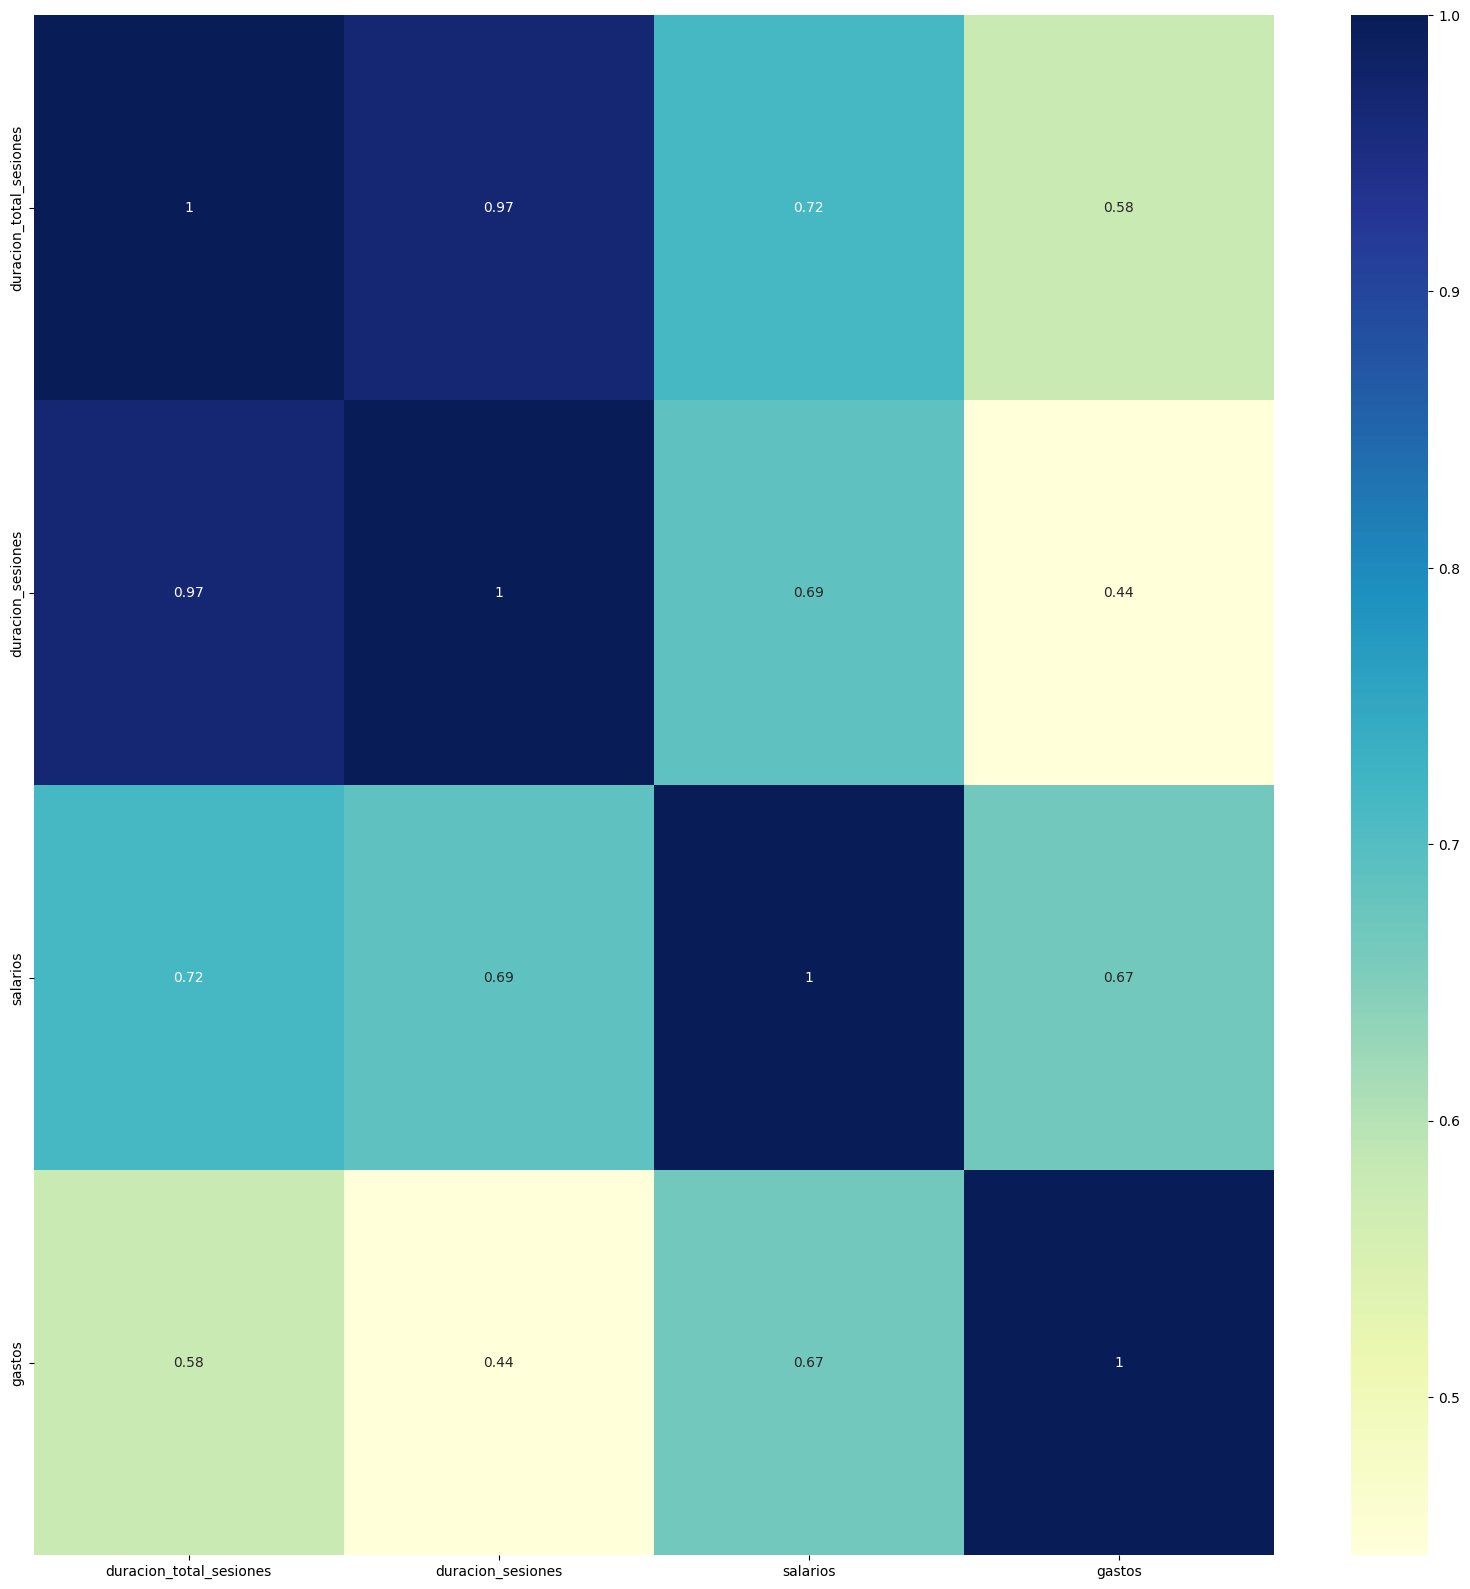

In [3]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(states.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [4]:
states.sort_values(by=['duracion_total_sesiones'],ascending=False).head(10)

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
New York,458.149994,427.149994,160.304016,2026.613831
California,390.000000,270.000000,213.405133,5521.194824
Arizona,286.129990,197.379997,48.393666,630.739258
Massachusetts,278.000000,278.000000,117.429547,477.220184
Ohio,258.000000,258.000000,122.161746,540.225769
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Michigan,213.000000,213.000000,160.606477,1141.694397
Colorado,205.199997,205.199997,60.492082,439.957687
North Carolina,181.760002,181.760002,28.130835,551.809753


In [5]:
states.sort_values(by=['duracion_sesiones'],ascending=False).head(10)

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
New York,458.149994,427.149994,160.304016,2026.613831
Massachusetts,278.000000,278.000000,117.429547,477.220184
California,390.000000,270.000000,213.405133,5521.194824
Ohio,258.000000,258.000000,122.161746,540.225769
Michigan,213.000000,213.000000,160.606477,1141.694397
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Colorado,205.199997,205.199997,60.492082,439.957687
Arizona,286.129990,197.379997,48.393666,630.739258
North Carolina,181.760002,181.760002,28.130835,551.809753


In [6]:
states.sort_values(by=['salarios'],ascending=False).head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
California,390.000000,270.000000,213.405133,5521.194824
Michigan,213.000000,213.000000,160.606477,1141.694397
New York,458.149994,427.149994,160.304016,2026.613831
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Illinois,169.000000,163.000000,136.784695,723.798859


In [7]:
states.sort_values(by=['gastos'],ascending=False).head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
California,390.000000,270.000000,213.405133,5521.194824
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Florida,101.529995,90.169998,60.530594,2086.795532
New York,458.149994,427.149994,160.304016,2026.613831
Texas,100.820000,99.400002,14.518100,1551.813599


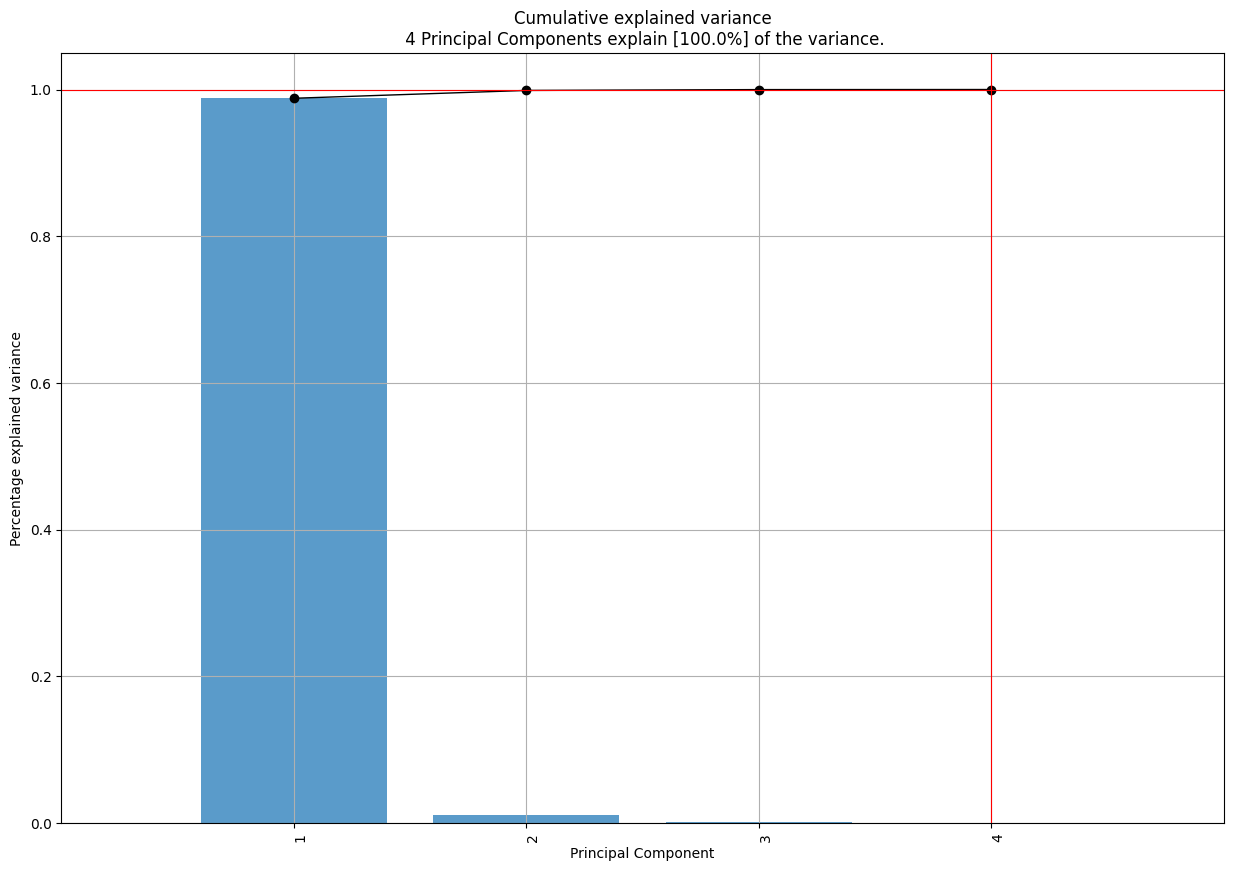

In [8]:
from pca import pca

model = pca(4,normalize=False,verbose=True)
results = model.fit_transform(states)

# Gráfica
fig, ax = model.plot()

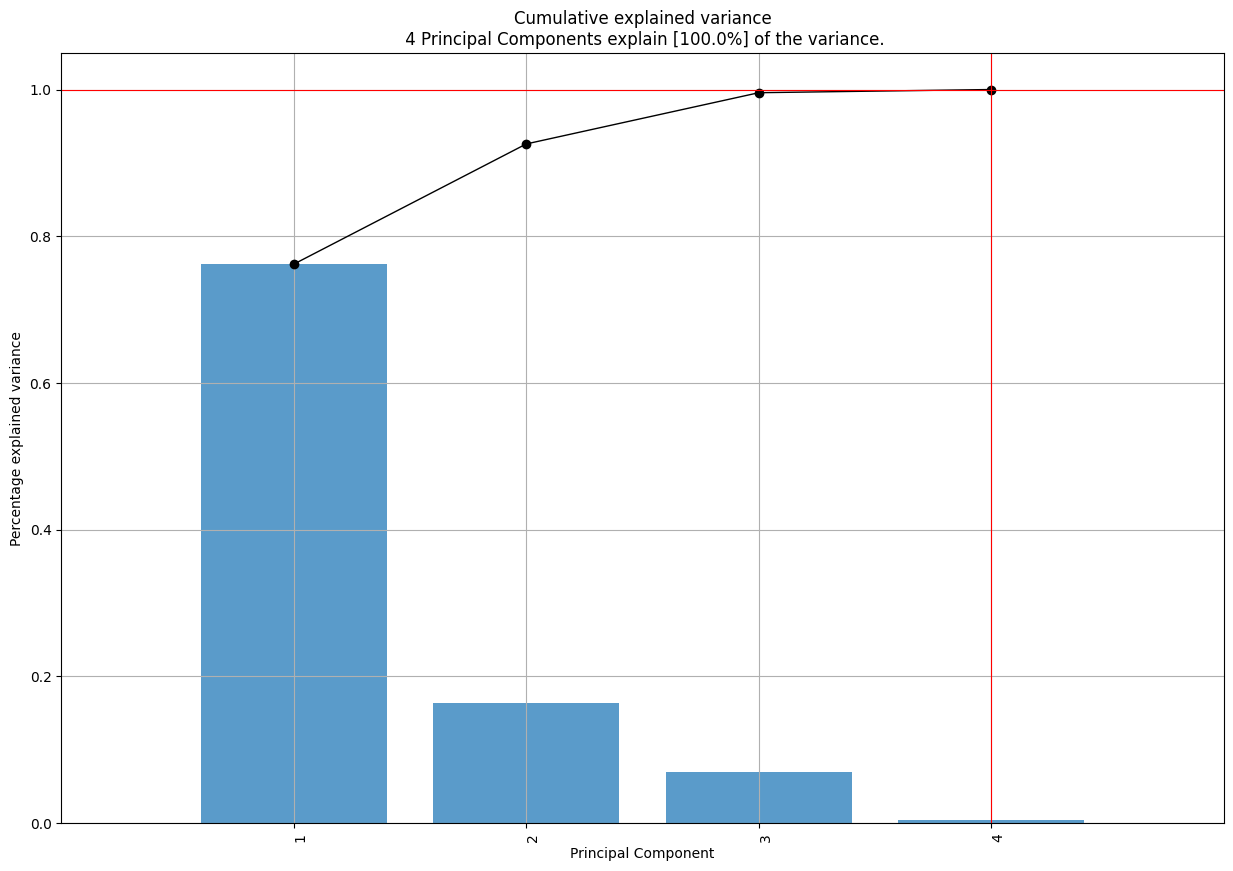

In [9]:
from pca import pca

model = pca(4,normalize=True,verbose=True)
results = model.fit_transform(states)

# Gráfica
fig, ax = model.plot()

In [10]:
#puedo obtener la varianza explicada
results.get('explained_var')

array([0.76, 0.93, 1.  , 1.  ])

In [11]:
model = pca(2,normalize=True,verbose=True)
results = model.fit_transform(states)

#ver los pesos o loadings
loadings_pca=model.results['loadings'].transpose()
loadings_pca

,PC1,PC2
duracion_total_sesiones,0.542149,-0.332387
duracion_sesiones,0.518524,-0.506513
salarios,0.503353,0.231372
gastos,0.428769,0.761203


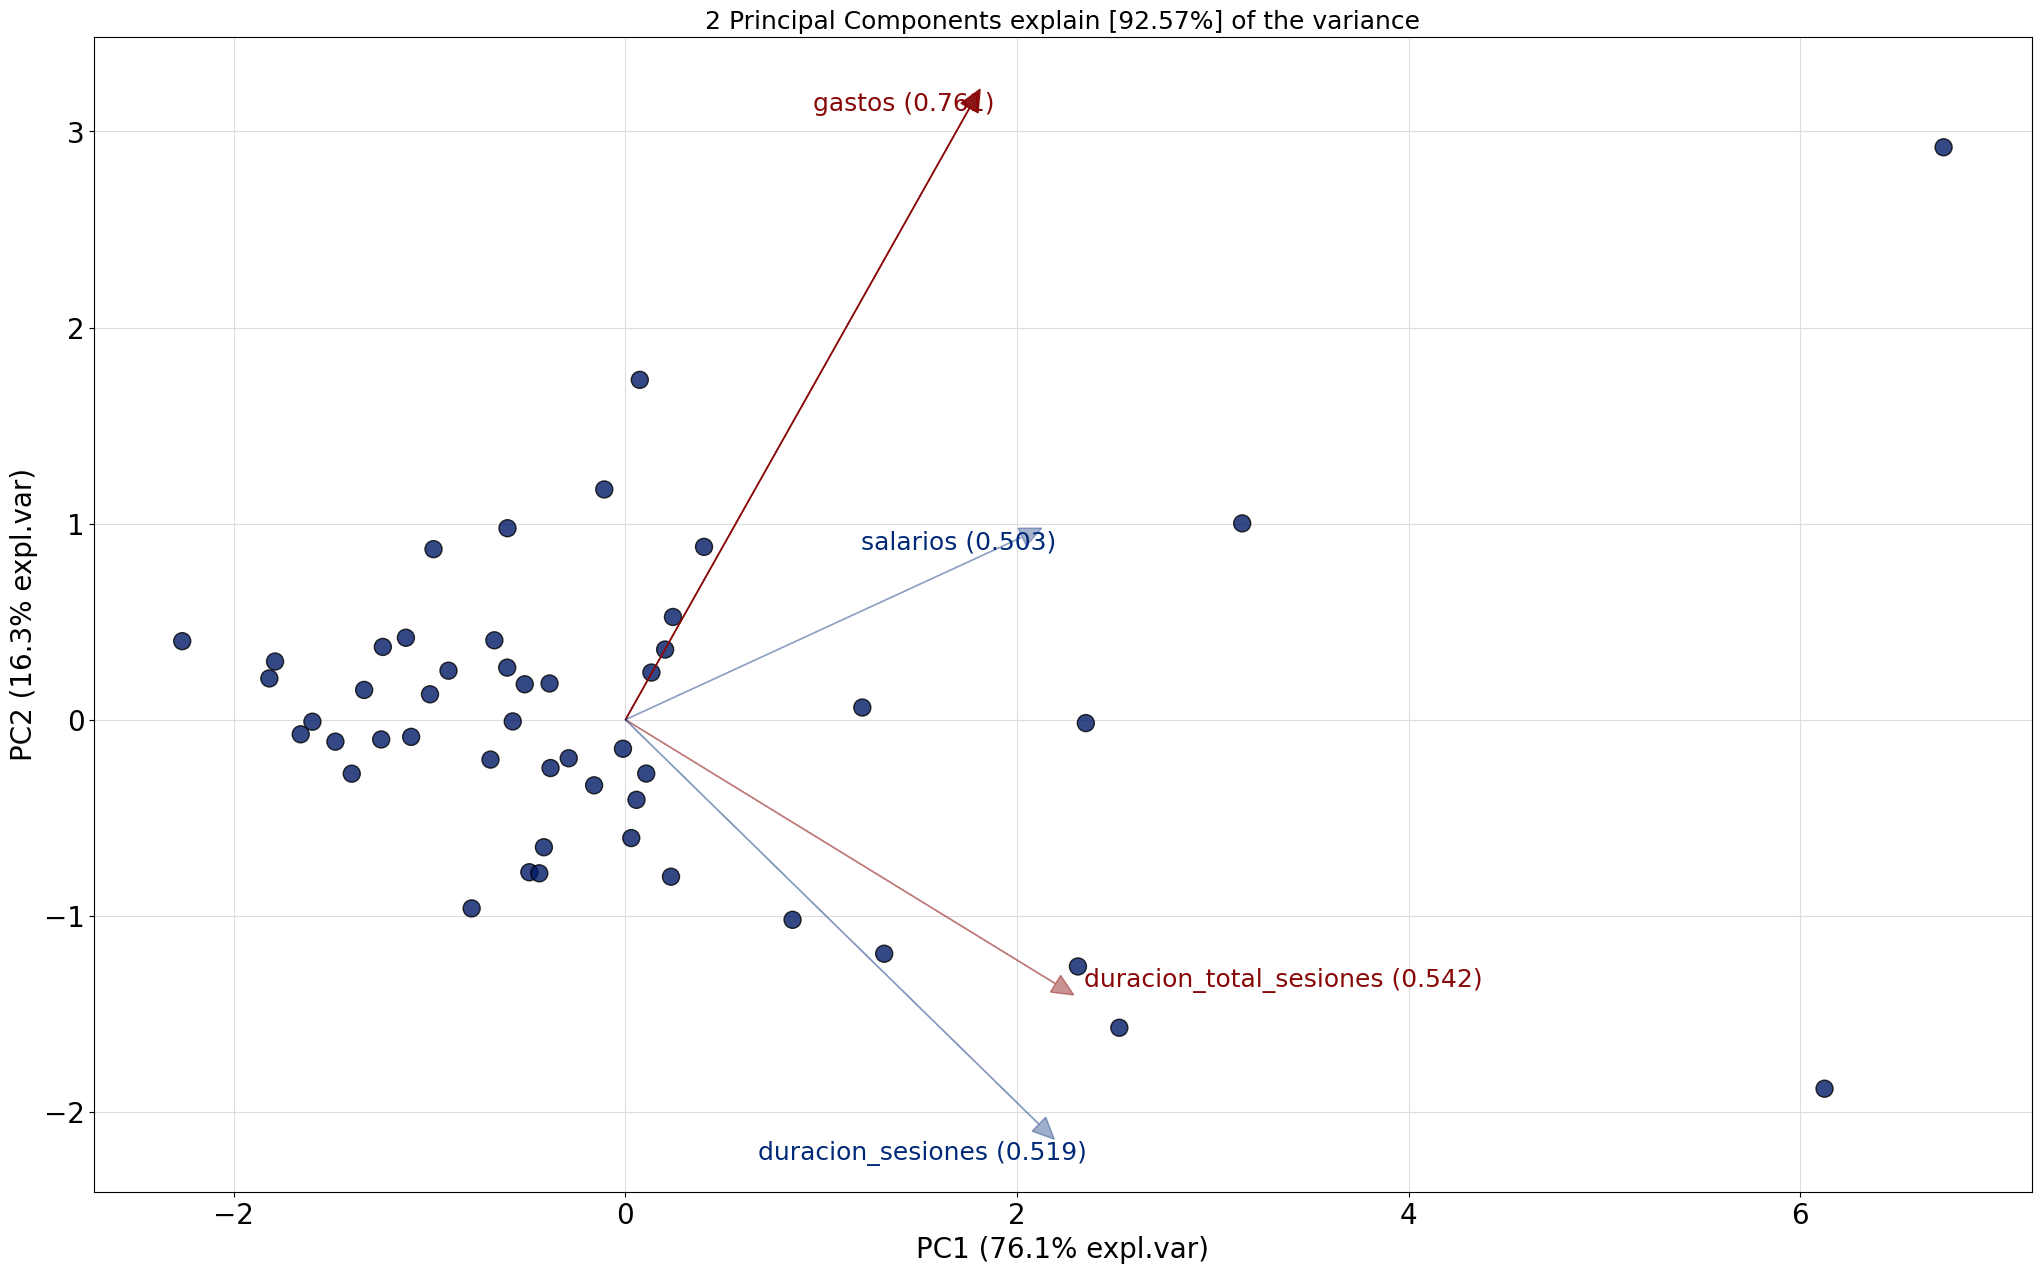

In [12]:
# Biplot
fig, ax = model.biplot(PC=[0, 1],legend=False)

In [13]:
scores=pd.DataFrame(scale(states).dot(loadings_pca))
scores["state"]=states.index
scores = scores.set_index("state")
scores.columns = ['PC1','PC2']
scores.head()

,PC1,PC2
state,,
Alabama,-1.094384,-0.087568
Alaska,0.401324,0.881470
Arizona,1.321492,-1.193515
Arkansas,-1.238863,0.371148
California,6.731493,2.919234


### Clustering: K-medias

In [14]:
from sklearn.cluster import KMeans


kmeans_c = KMeans(n_clusters = 5, random_state = 1234).fit(scores)
states['cluster'] = kmeans_c.labels_

states.groupby('cluster').mean()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
cluster,,,,
0,138.232083,134.064166,52.317443,626.204642
1,458.149994,427.149994,160.304016,2026.613831
2,241.021665,220.063333,123.881670,991.169556
3,390.000000,270.000000,213.405133,5521.194824
4,87.425294,82.919412,19.830976,466.043316


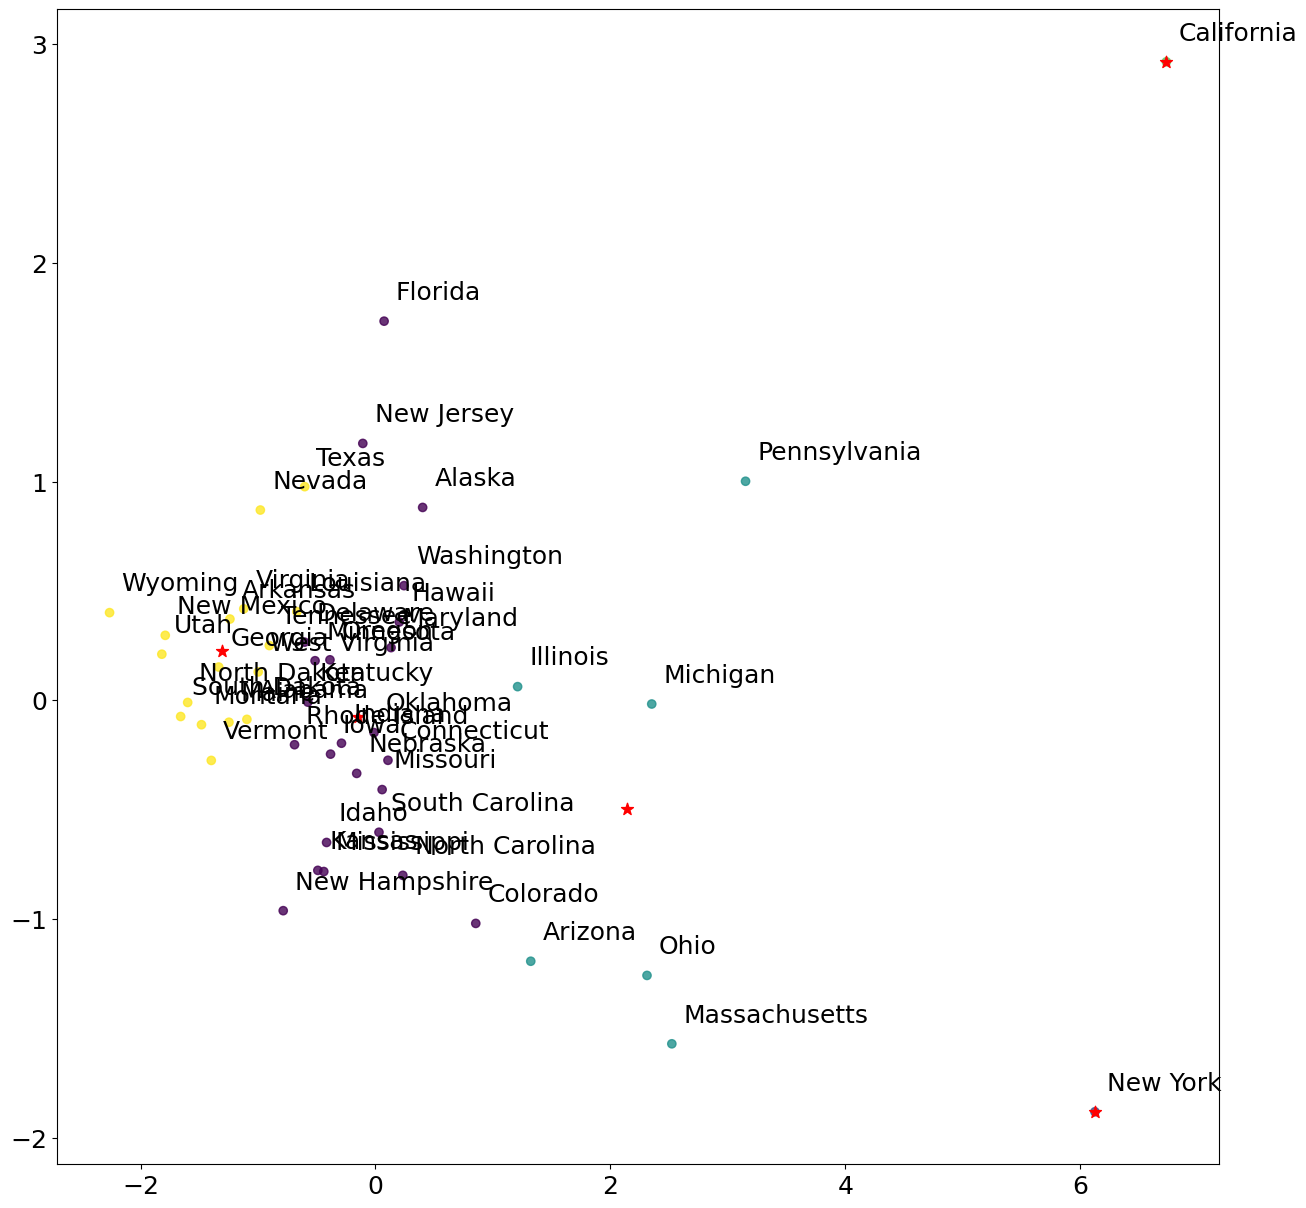

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster'], alpha = 0.8, label = "Centroides")
plt.scatter(kmeans_c.cluster_centers_[:,0],kmeans_c.cluster_centers_[:,1],c=['r'],marker='*',s=80)
for i in range(scores.shape[0]):
  plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i]       )
plt.show()

In [16]:
from sklearn.metrics import silhouette_score


rg=5

varianza_intra_cluster = []
silhouettes = []

for k in range (1, rg): # Evaluamos entre 1 a rg clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(scores)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(scores, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

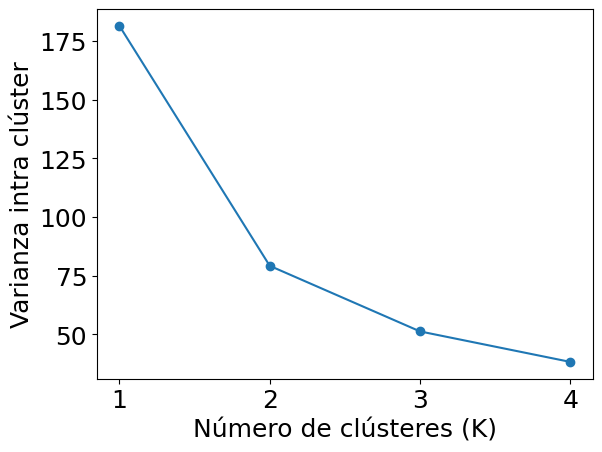

In [17]:
plt.plot(range(1, rg), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

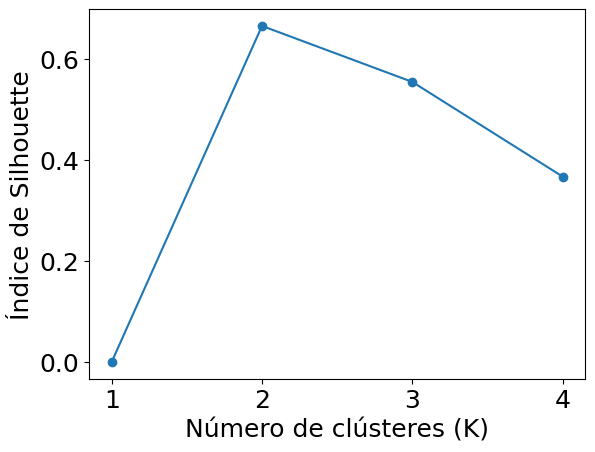

In [18]:
plt.plot(range(1, rg), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 2, random_state = 1234).fit(scores)
states['cluster'] = kmeans.labels_
scores['cluster'] = kmeans.labels_
states.head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos,cluster
state,,,,,
Alabama,116.550003,104.550003,1.470589,534.717224,0
Alaska,128.510002,127.800003,74.805863,1493.441223,0
Arizona,286.129990,197.379997,48.393666,630.739258,0
Arkansas,80.230000,80.230000,30.669025,516.390595,0
California,390.000000,270.000000,213.405133,5521.194824,1


In [20]:
scores.groupby('cluster').mean()

,PC1,PC2
cluster,,
0,-0.539279,0.018796
1,3.864832,-0.134705


In [21]:
states.groupby('cluster').mean()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
cluster,,,,
0,122.300697,115.989535,41.347060,565.260137
1,306.524999,276.191666,155.303468,2023.381312


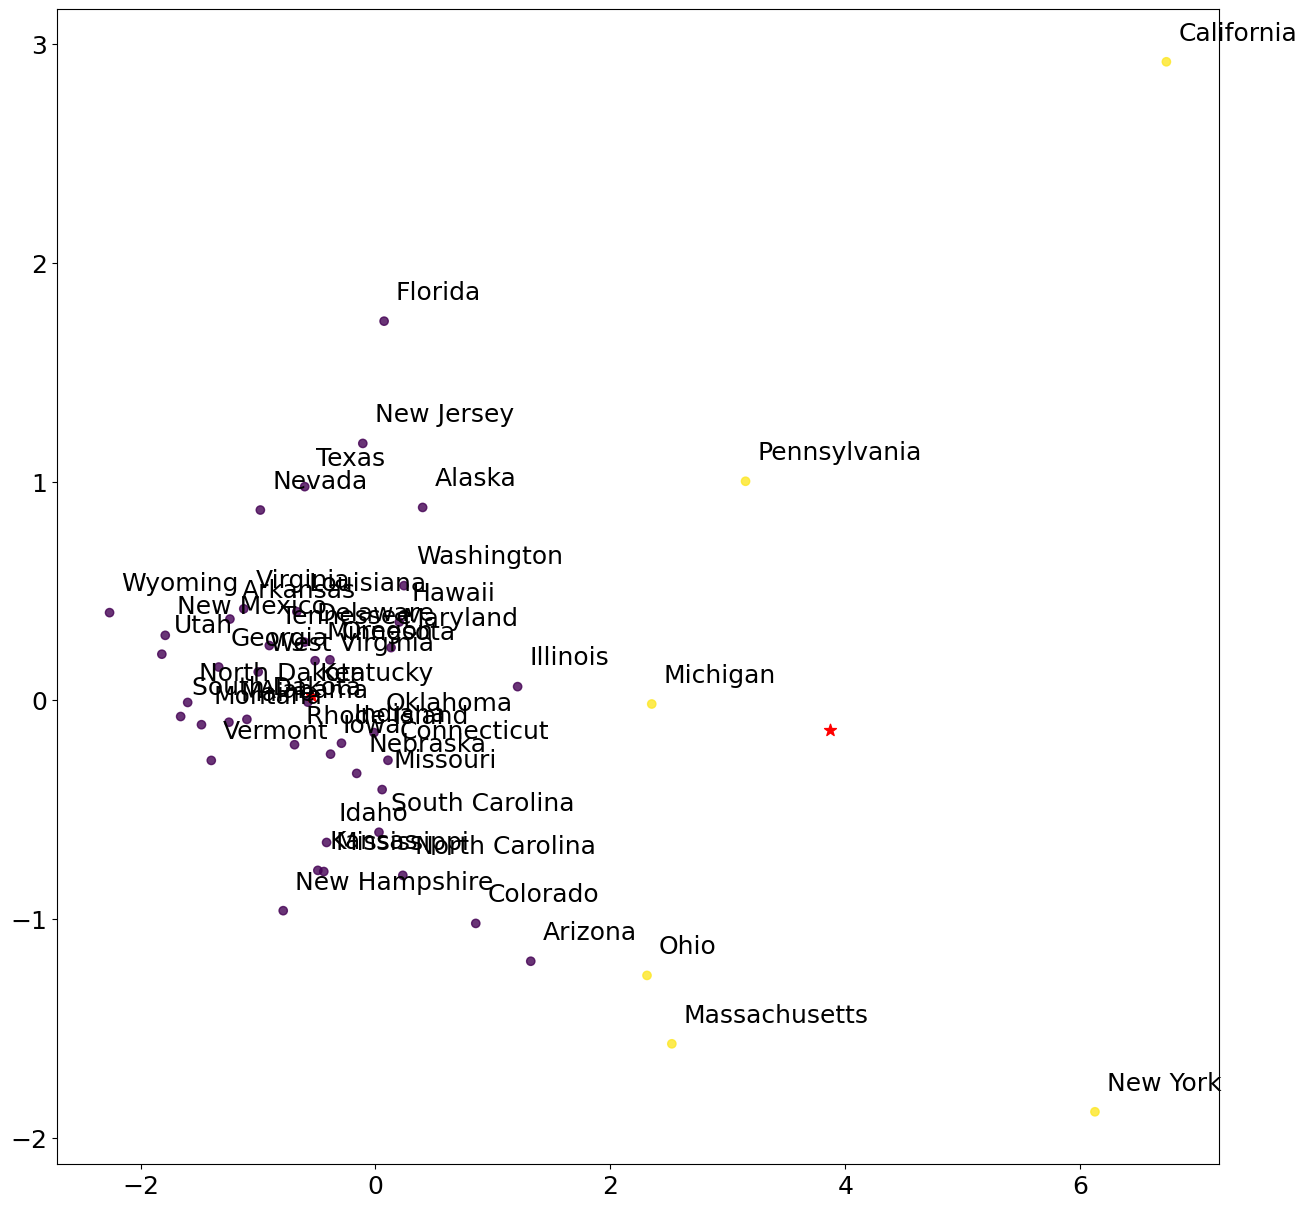

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster'], alpha = 0.8, label = "Centroides")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c=['r'],marker='*',s=80)
for i in range(scores.shape[0]):
 plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i]       )
plt.show()

### 4. K-medoides


In [23]:
from sklearn_extra.cluster import KMedoids 


Kmedoides_scores = KMedoids(n_clusters = 3, random_state = 321).fit(scores)
states['cluster_medoids'] = Kmedoides_scores.labels_
scores['cluster_medoids'] = Kmedoides_scores.labels_

In [24]:
states.groupby('cluster_medoids').mean()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos,cluster
cluster_medoids,,,,,
0,81.229091,79.234546,14.063116,260.729080,0.00000
1,108.291999,101.444666,49.856315,895.317396,0.00000
2,199.138260,184.845652,78.574148,876.030129,0.26087


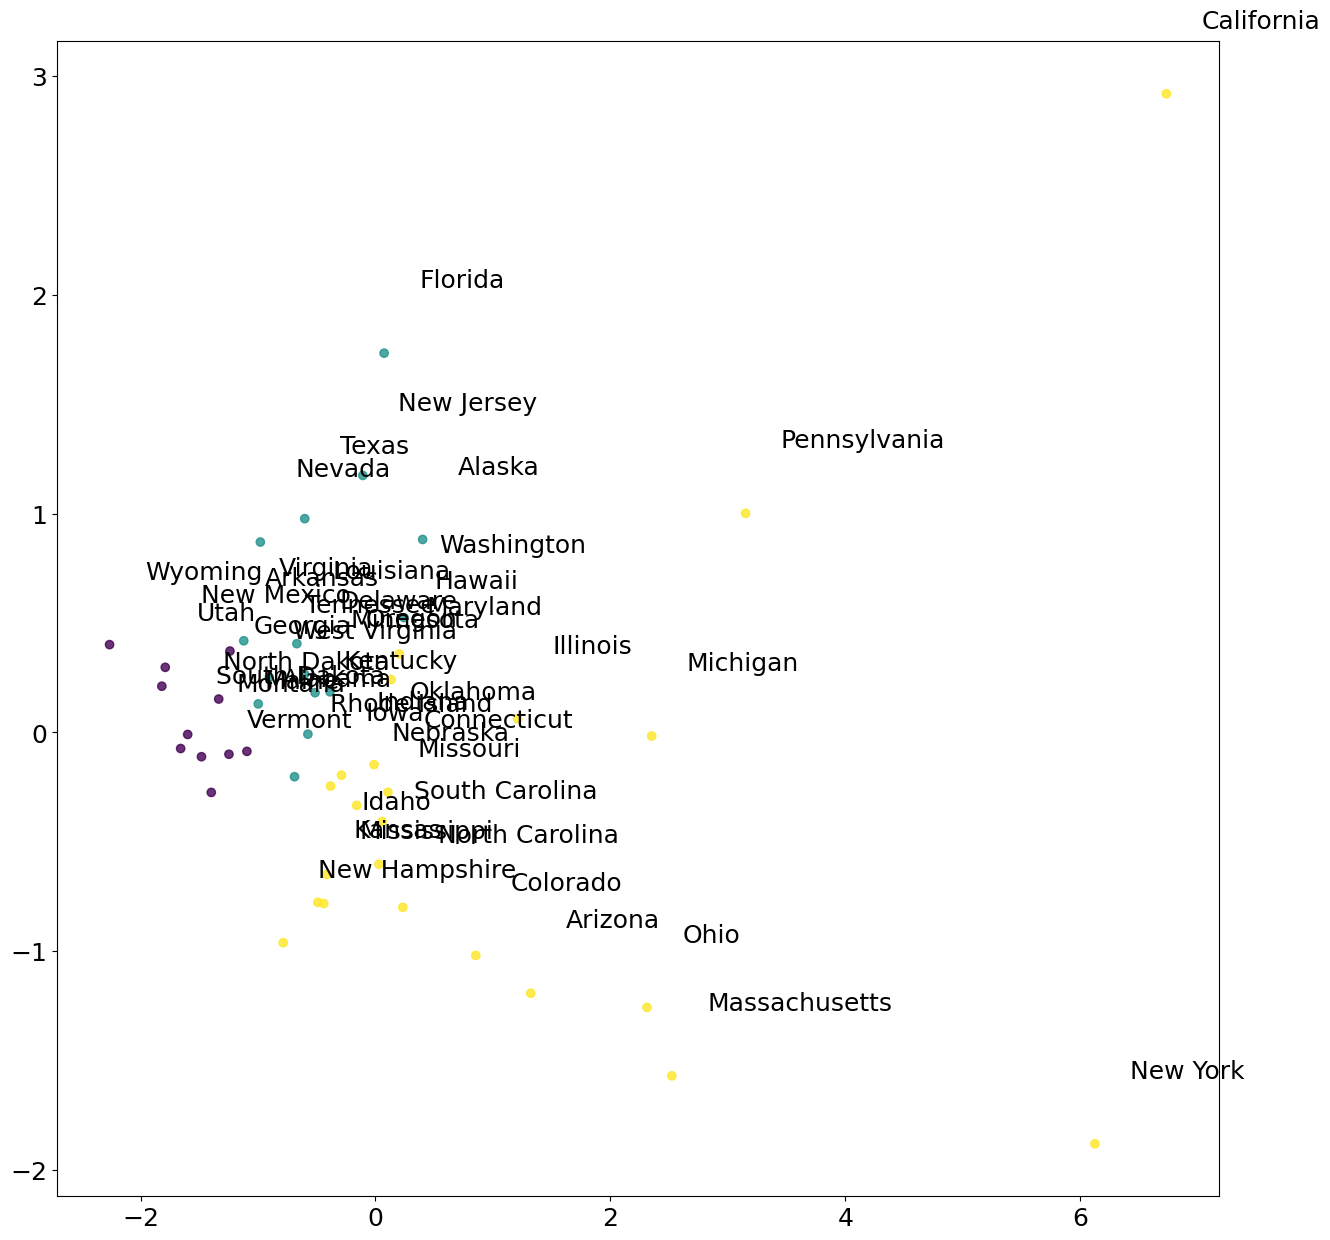

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster_medoids'], alpha = 0.8, label = "Centroides")
for i in range(scores.shape[0]):
 plt.text(x=scores.PC1[i]+0.3,y=scores.PC2[i]+0.3,s=scores.index[i])
plt.show()

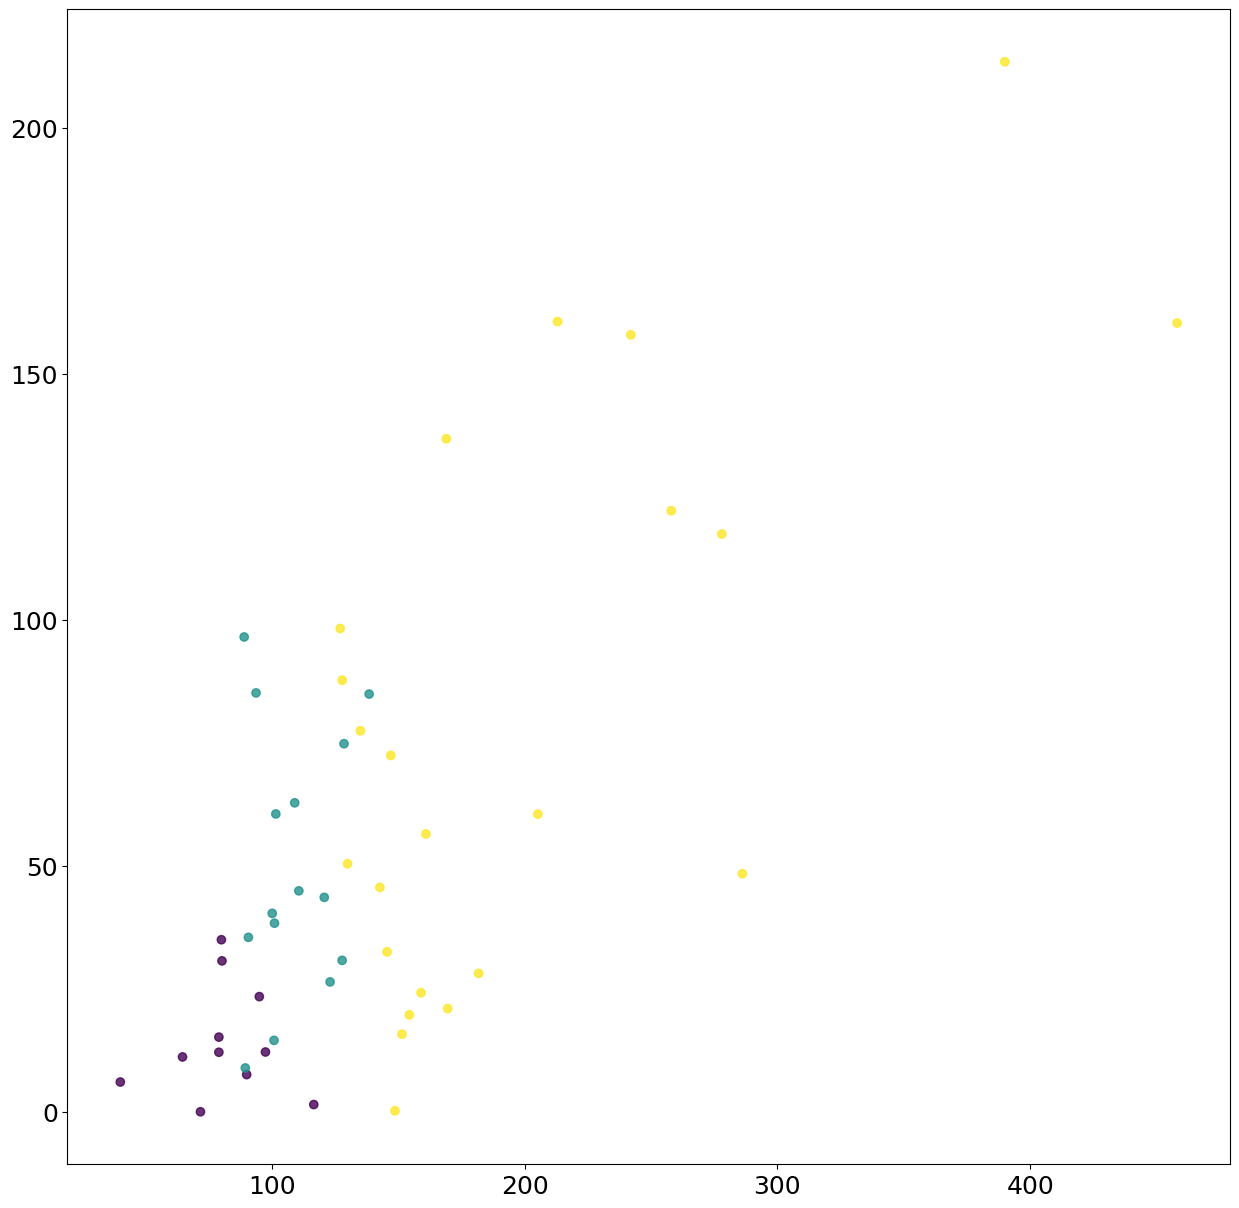

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(states.iloc[:,0], states.iloc[:,2], c = states['cluster_medoids'], alpha = 0.8, label = "Centroides")
#for i in range(states.shape[0]):
 #plt.text(x=states.iloc[i,0]+0.3,y=states.iloc[i,1]+0.3,s=states.index[i])
plt.show()

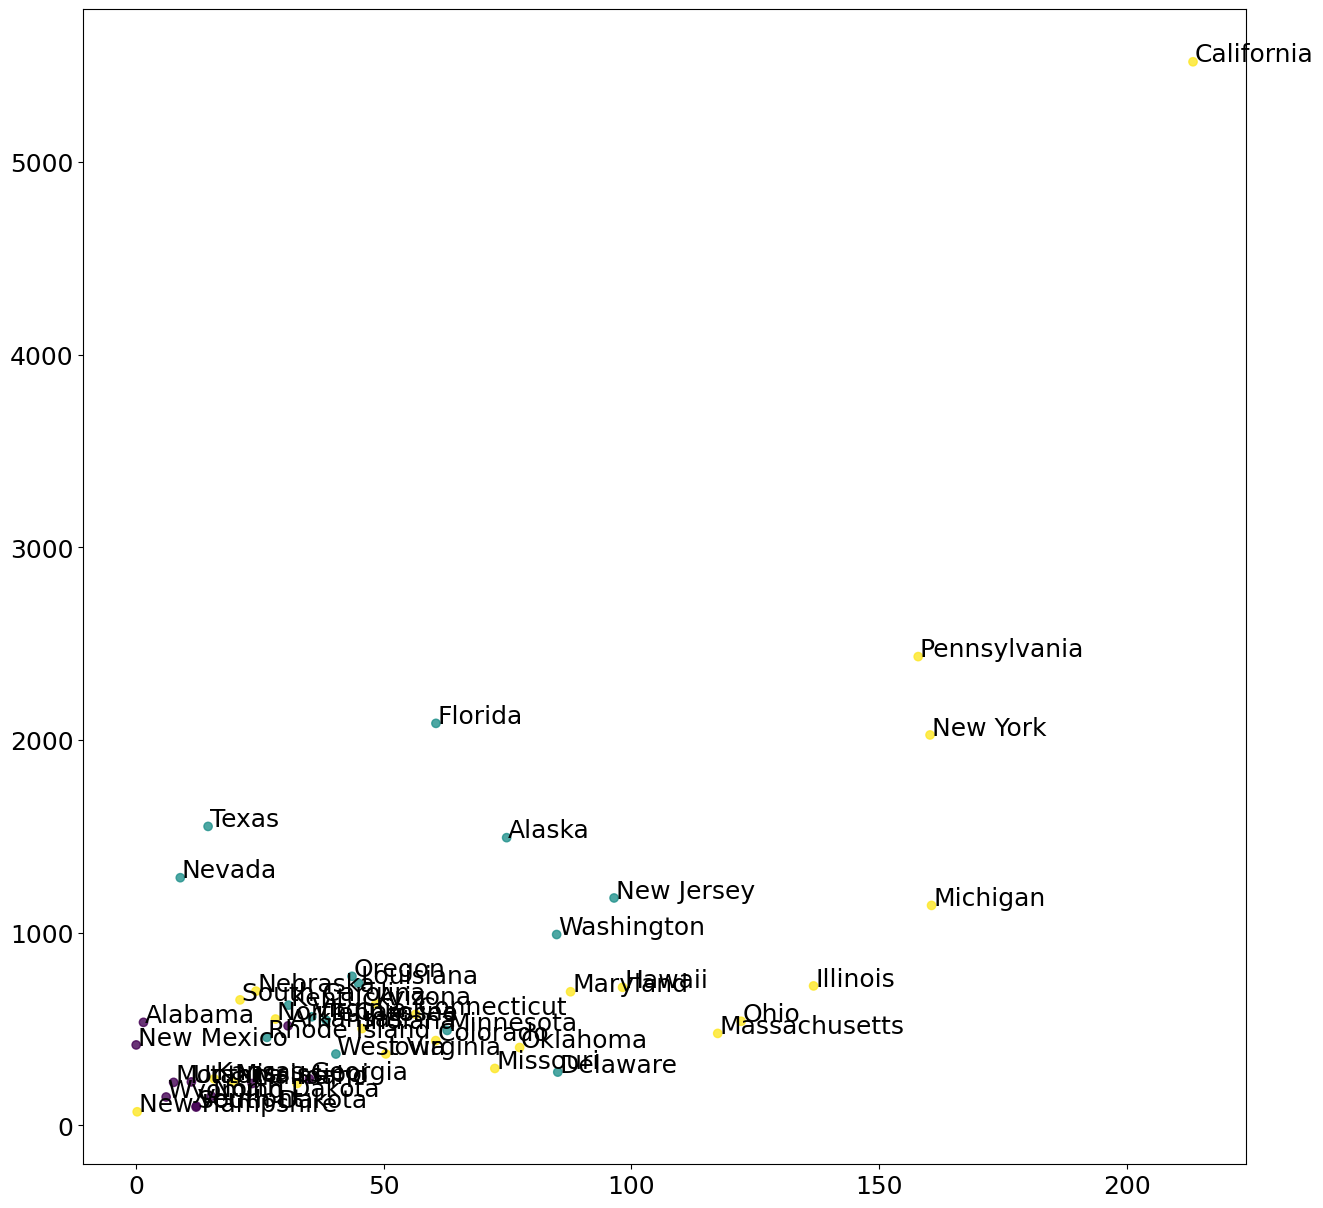

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(states.iloc[:,2], states.iloc[:,3], c = states['cluster_medoids'], alpha = 0.8, label = "Centroides")
for i in range(states.shape[0]):
 plt.text(x=states.iloc[i,2]+0.3,y=states.iloc[i,3]+0.3,s=states.index[i])
plt.show()

In [28]:
Kmedoides_scaled = KMedoids(n_clusters = 2, random_state = 321).fit(scale(states))


In [29]:
states['cluster_medoids_scaled'] = Kmedoides_scaled.labels_
scores['cluster_medoids_scaled'] = Kmedoides_scaled.labels_

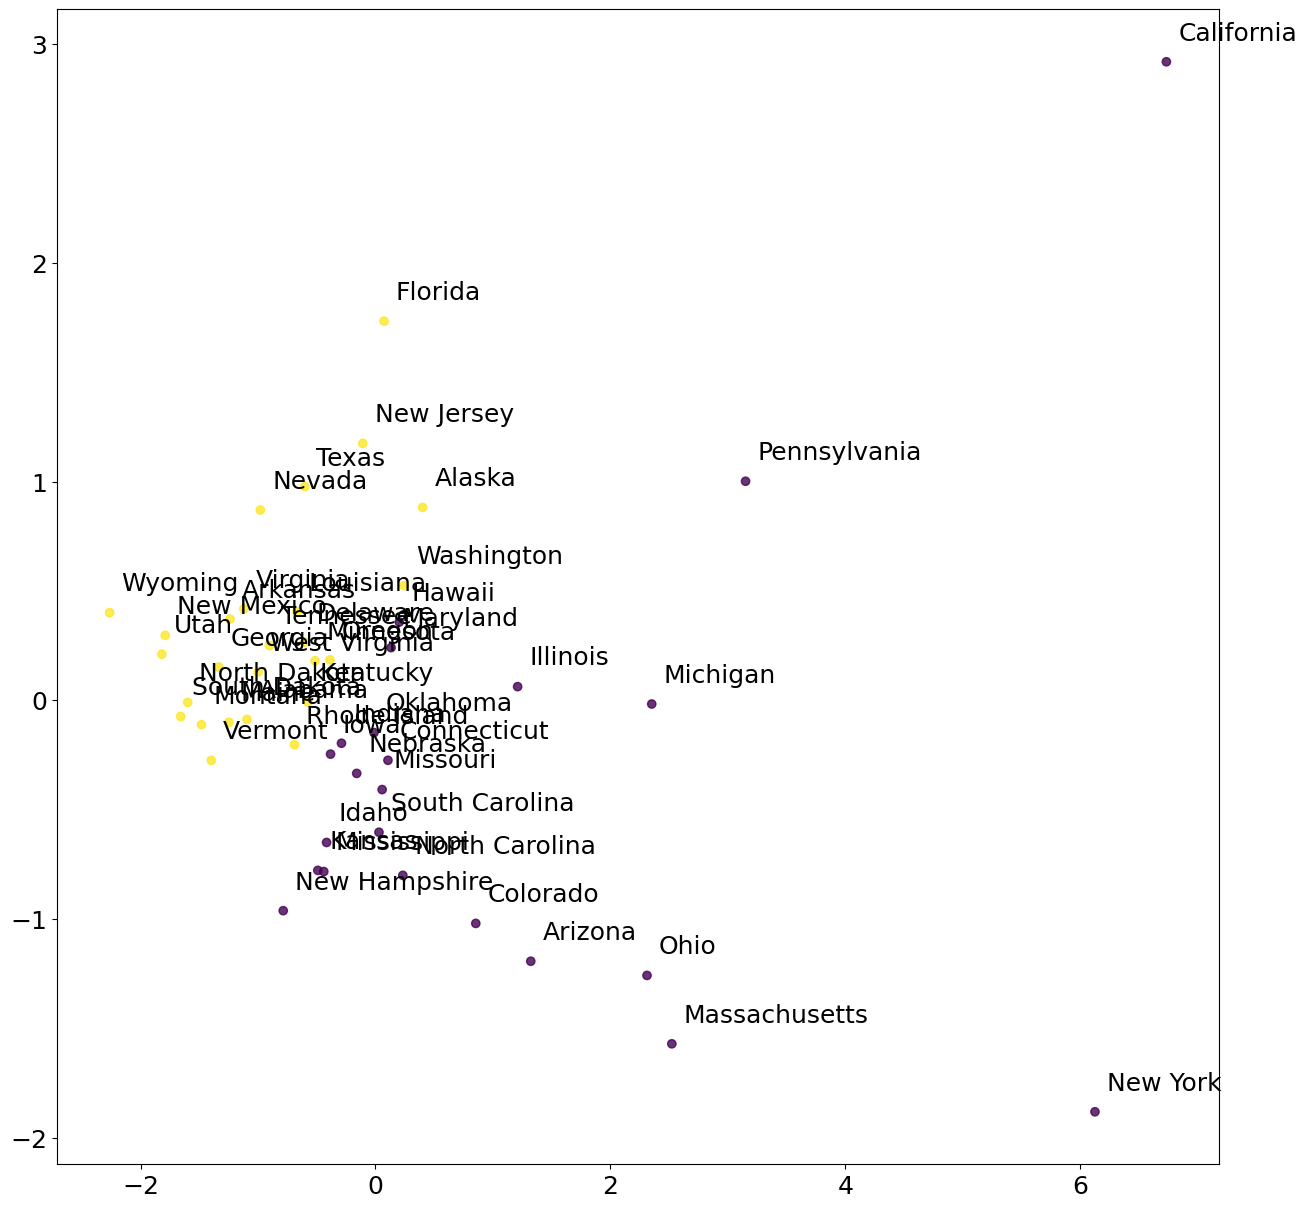

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster_medoids_scaled'], alpha = 0.8, label = "Centroides")
for i in range(scores.shape[0]):
 plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])
plt.show()

# Referencias

- Leskovec, J., Rajaraman, A., & Ullman, J. D. (2020). Mining of massive data sets. Cambridge university press.
- Waggoner, P. Unsupervised Machine Learning for Clustering in Political and Social Research. Mimeo

# Información de Sesión

In [31]:
import session_info

session_info.show(html=False)

-----
matplotlib          3.5.3
numpy               1.18.4
pandas              1.0.3
pca                 2.10.0
seaborn             0.12.2
session_info        v1.0.1
sklearn             1.0.2
sklearn_extra       0.3.0
-----
IPython             7.34.0
jupyter_client      7.4.9
jupyter_core        4.12.0
jupyterlab          2.1.1
notebook            6.0.3
-----
Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
Linux-6.5.0-1020-aws-x86_64-with-debian-buster-sid
-----
Session information updated at 2025-08-22 11:18
